In [164]:
# Importando os módulos:
import pandas as pd
import folium
from folium import plugins
import matplotlib.pyplot as plt
import collections
import datetime
import numpy as np

In [165]:
dataset_v01 = pd.read_csv(r"C:\Users\Stephanie\Documents\6ºSemestreFatec\API\dataset_v01\dataset_v01.csv")

In [166]:
dataset_v01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         10000 non-null  object
 1   dat_nsc    9936 non-null   object
 2   renda      10000 non-null  object
 3   latitude   8743 non-null   object
 4   longitude  8743 non-null   object
dtypes: object(5)
memory usage: 390.8+ KB


In [167]:
dataset_v01['latitude'] = dataset_v01['latitude'].str.replace(',', '.')
dataset_v01['longitude'] = dataset_v01['longitude'].str.replace(',', '.')

In [168]:
renda_1 = dataset_v01.query('renda == "DE R$ 788,00 A R$ 1.140,00"')
renda_1

,id,dat_nsc,renda,latitude,longitude
3,62c0f1e6-36f2-4205-a134-232a58a6f8a5,1975-08-28 00:00:00,"DE R$ 788,00 A R$ 1.140,00",-15.059042000004,-48.163372000004
4,0cef9719-0aa3-49a2-adea-9c09c04de071,1957-06-17 00:00:00,"DE R$ 788,00 A R$ 1.140,00",-17.694658000004,-42.522280000004
5,44699a6d-8617-432d-82ca-b8e721014f4e,1979-09-20 00:00:00,"DE R$ 788,00 A R$ 1.140,00",-05.033333000003,-44.441667000003
6,ae9b54e7-01c9-4917-921a-20fa59c309ca,1973-10-27 00:00:00,"DE R$ 788,00 A R$ 1.140,00",-03.611331860469,-45.342584883725
8,e58a40ed-a771-4462-b5ee-d88ca0bd7e39,1958-05-28 00:00:00,"DE R$ 788,00 A R$ 1.140,00",-18.451469648461,-43.741779145848
...,...,...,...,...,...
9986,dafe6671-4e15-4cb6-952c-730ca726bd99,1943-12-23 00:00:00,"DE R$ 788,00 A R$ 1.140,00",NaN,NaN
9990,8cb30238-1f02-4d75-9d06-30a904b72844,1972-03-22 00:00:00,"DE R$ 788,00 A R$ 1.140,00",-07.979340810815,-34.837577027031
9991,0652d454-ec70-4177-8231-d3a7a5d605c0,1981-05-14 00:00:00,"DE R$ 788,00 A R$ 1.140,00",-14.041742727277,-52.156383636368
9997,e7b37cd5-714a-44d8-ad7f-4ed3aa6b0695,1976-05-26 00:00:00,"DE R$ 788,00 A R$ 1.140,00",-08.330678648653,-36.136897027031


In [169]:
renda_2 = dataset_v01.query('renda == "DE R$ 1.900,00 A R$ 3.800,00"')
renda_2

,id,dat_nsc,renda,latitude,longitude
0,d6c0cc1d-eb61-486a-b5c3-50725ef44d61,1981-01-30 00:00:00,"DE R$ 1.900,00 A R$ 3.800,00",-04.847580000004,-37.784390000004
7,3288a30d-af15-423e-a68a-1e9d0a017881,1981-08-05 00:00:00,"DE R$ 1.900,00 A R$ 3.800,00",-07.191076842109,-48.193942631583
9,a3d1ee2f-7ea5-42ff-b6d1-87d5eda81800,1976-09-13 00:00:00,"DE R$ 1.900,00 A R$ 3.800,00",-12.992790000004,-38.465430000004
10,8d899207-76e4-49a4-8f81-de942c29c14c,1976-10-17 00:00:00,"DE R$ 1.900,00 A R$ 3.800,00",-08.011778571433,-34.883295918371
13,1762fc9d-ea36-4900-9469-684e2c507035,1987-04-04 00:00:00,"DE R$ 1.900,00 A R$ 3.800,00",-04.946685555560,-48.397306666671
...,...,...,...,...,...
9989,239cd94e-cfd3-41a8-9838-5d11180881c6,1977-06-30 00:00:00,"DE R$ 1.900,00 A R$ 3.800,00",-23.682434500004,-46.801669000004
9992,886b9b70-b00a-480e-aa5c-49b96a8335b8,1978-07-19 00:00:00,"DE R$ 1.900,00 A R$ 3.800,00",-29.685526407771,-51.139584563111
9993,9de253e2-d43b-4926-8e3b-f58663aec885,1974-10-16 00:00:00,"DE R$ 1.900,00 A R$ 3.800,00",-03.789461000004,-38.491887266671
9994,da4f8470-b7db-46fd-9877-8761b1c8cadc,1978-08-28 00:00:00,"DE R$ 1.900,00 A R$ 3.800,00",-29.590372631583,-51.215815789478


In [170]:
renda_3 = dataset_v01.query('renda == "DE R$ 3.800,00 A R$ 7.600,00"')
renda_3

,id,dat_nsc,renda,latitude,longitude
1,da0067e7-aa6b-4355-b373-ca17f6ac3b44,1978-01-28 00:00:00,"DE R$ 3.800,00 A R$ 7.600,00",-26.990118139539,-48.637165232562
2,2d729b8a-d53c-48e7-8bf5-33b021980c04,1954-12-09 00:00:00,"DE R$ 3.800,00 A R$ 7.600,00",-05.053671016443,-42.813152032883
11,b00f4f83-305e-44bd-86de-3892c446a11f,1932-03-20 00:00:00,"DE R$ 3.800,00 A R$ 7.600,00",-28.290480000004,-52.814700000004
14,79639876-7cc9-476d-8c7b-163a729cbaf6,1970-08-13 00:00:00,"DE R$ 3.800,00 A R$ 7.600,00",-23.717175000004,-46.586408750004
16,a9f93d1f-e893-4245-8cdf-0f4b0d986785,1954-10-29 00:00:00,"DE R$ 3.800,00 A R$ 7.600,00",-26.869232432436,-49.073902702707
...,...,...,...,...,...
9984,0510ec4b-2a4c-4706-ade4-5e77fd97af64,1958-02-03 00:00:00,"DE R$ 3.800,00 A R$ 7.600,00",-23.229761025645,-46.880376025645
9985,782c7131-425a-4360-bebf-cecc3765eb47,1949-06-02 00:00:00,"DE R$ 3.800,00 A R$ 7.600,00",-23.191568571433,-46.851845000004
9988,a052d4b9-aacf-48f7-afe5-6948ad692d73,1967-06-02 00:00:00,"DE R$ 3.800,00 A R$ 7.600,00",-02.510270000004,-44.300330000004
9996,bdaa7802-4650-44a4-93f7-952b72ec17a0,1980-04-30 00:00:00,"DE R$ 3.800,00 A R$ 7.600,00",-15.650496679839,-47.793320590563


In [171]:
mapa = folium.Map(location=[-23.229761025645,-46.880376025645])
folium.CircleMarker(
    location=[-23.229761025645,-46.880376025645],
    radius=50,
    color='#3186cc',
    fill=True,
    fill_color='#3186cc'
).add_to(mapa)
mapa

In [172]:
dataset_v01.fillna(0, inplace=True)

In [173]:
# Extraindo as coordenadas de 8743 registros:
coordenadas=[]
for lat,lng in zip(dataset_v01.latitude.values[:8743],dataset_v01.longitude.values[:8743]):
  coordenadas.append([lat,lng])

In [174]:
# Renderizando o mapa com algumas personalizações:
mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=5,tiles='Stamen Toner')

In [175]:
# Adicionando os registros no mapa de calor:
mapa.add_child(plugins.HeatMap(coordenadas))        
mapa

In [176]:
mapa.save('mapa-consumidor.html')

In [177]:
dataset_v01['renda'].value_counts(normalize=True)

DE R$ 1.900,00 A R$ 3.800,00    0.4762
DE R$ 788,00 A R$ 1.140,00      0.3197
DE R$ 3.800,00 A R$ 7.600,00    0.1962
MAIOR QUE R$ 7.600,00           0.0079
Name: renda, dtype: float64

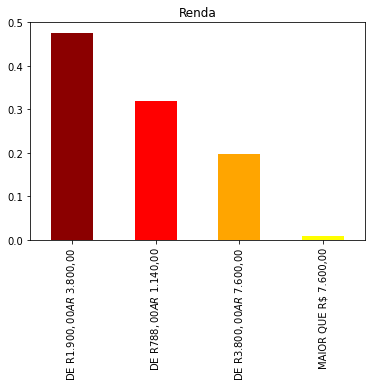

In [178]:
dataset_v01['renda'].value_counts(normalize=True).plot(kind='bar',title='Renda', color=['darkred', 'red', 'orange', 'yellow']);

In [179]:
lista= dataset_v01['dat_nsc'].to_list()
lista

['1981-01-30 00:00:00',
 '1978-01-28 00:00:00',
 '1954-12-09 00:00:00',
 '1975-08-28 00:00:00',
 '1957-06-17 00:00:00',
 '1979-09-20 00:00:00',
 '1973-10-27 00:00:00',
 '1981-08-05 00:00:00',
 '1958-05-28 00:00:00',
 '1976-09-13 00:00:00',
 '1976-10-17 00:00:00',
 '1932-03-20 00:00:00',
 '1968-12-26 00:00:00',
 '1987-04-04 00:00:00',
 '1970-08-13 00:00:00',
 '1964-02-03 00:00:00',
 '1954-10-29 00:00:00',
 '1975-05-20 00:00:00',
 0,
 '1972-01-16 00:00:00',
 '1949-11-30 00:00:00',
 '1980-05-30 00:00:00',
 '1986-08-03 00:00:00',
 '1947-11-25 00:00:00',
 '1964-02-19 00:00:00',
 '1973-02-20 00:00:00',
 '1981-02-04 00:00:00',
 '1980-05-19 00:00:00',
 '1983-08-16 00:00:00',
 '1973-08-06 00:00:00',
 '1948-05-09 00:00:00',
 '1972-11-10 00:00:00',
 '1965-09-19 00:00:00',
 '1989-06-16 00:00:00',
 '1978-05-30 00:00:00',
 '1975-12-08 00:00:00',
 '1966-02-21 00:00:00',
 '1953-07-22 00:00:00',
 '1982-09-20 00:00:00',
 '1957-04-02 00:00:00',
 '1976-01-16 00:00:00',
 '1981-10-27 00:00:00',
 '1951-09-19

In [180]:
len(lista)

10000

In [181]:
dataframe=dataset_v01['dat_nsc'].to_frame()
dataframe

,dat_nsc
0,1981-01-30 00:00:00
1,1978-01-28 00:00:00
2,1954-12-09 00:00:00
3,1975-08-28 00:00:00
4,1957-06-17 00:00:00
...,...
9995,1979-10-08 00:00:00
9996,1980-04-30 00:00:00
9997,1976-05-26 00:00:00
9998,1985-11-06 00:00:00


In [182]:
serie=dataset_v01['dat_nsc']
serie

0       1981-01-30 00:00:00
1       1978-01-28 00:00:00
2       1954-12-09 00:00:00
3       1975-08-28 00:00:00
4       1957-06-17 00:00:00
               ...         
9995    1979-10-08 00:00:00
9996    1980-04-30 00:00:00
9997    1976-05-26 00:00:00
9998    1985-11-06 00:00:00
9999    1981-03-09 00:00:00
Name: dat_nsc, Length: 10000, dtype: object

In [183]:
data_time=pd.to_datetime(dataset_v01['dat_nsc'])
data_time

0      1981-01-30
1      1978-01-28
2      1954-12-09
3      1975-08-28
4      1957-06-17
          ...    
9995   1979-10-08
9996   1980-04-30
9997   1976-05-26
9998   1985-11-06
9999   1981-03-09
Name: dat_nsc, Length: 10000, dtype: datetime64[ns]

In [184]:
df = pd.DataFrame({'ano-mes-dia': pd.to_datetime(lista)})
df

,ano-mes-dia
0,1981-01-30
1,1978-01-28
2,1954-12-09
3,1975-08-28
4,1957-06-17
...,...
9995,1979-10-08
9996,1980-04-30
9997,1976-05-26
9998,1985-11-06


In [185]:
dat_ano = df['ano-mes-dia'].dt.year 
data_ano

0       1981
1       1978
2       1954
3       1975
4       1957
        ... 
9995    1979
9996    1980
9997    1976
9998    1985
9999    1981
Name: Joined date, Length: 10000, dtype: int64

In [186]:
lista_data_ano=data_ano.to_list()
lista_data_ano

[1981,
 1978,
 1954,
 1975,
 1957,
 1979,
 1973,
 1981,
 1958,
 1976,
 1976,
 1932,
 1968,
 1987,
 1970,
 1964,
 1954,
 1975,
 1970,
 1972,
 1949,
 1980,
 1986,
 1947,
 1964,
 1973,
 1981,
 1980,
 1983,
 1973,
 1948,
 1972,
 1965,
 1989,
 1978,
 1975,
 1966,
 1953,
 1982,
 1957,
 1976,
 1981,
 1951,
 1974,
 1975,
 1967,
 1962,
 1925,
 1958,
 1955,
 1938,
 1953,
 1975,
 1983,
 1955,
 1966,
 1956,
 1973,
 1952,
 1948,
 1981,
 1967,
 1975,
 1977,
 1966,
 1975,
 1962,
 1976,
 1987,
 1974,
 1938,
 1975,
 1939,
 1979,
 1961,
 1977,
 1981,
 1977,
 1974,
 1954,
 1977,
 1976,
 1973,
 1977,
 1982,
 1958,
 1978,
 1960,
 1964,
 1975,
 1964,
 1949,
 1981,
 1980,
 1976,
 1981,
 1972,
 1976,
 1977,
 1970,
 1987,
 1966,
 1971,
 1937,
 1982,
 1970,
 1976,
 1967,
 1974,
 1928,
 1976,
 1973,
 1936,
 1966,
 1985,
 1967,
 1988,
 1974,
 1974,
 1971,
 1971,
 1977,
 1960,
 1981,
 1976,
 1984,
 1981,
 1961,
 1972,
 1972,
 1975,
 1982,
 1980,
 1986,
 1973,
 1976,
 1980,
 1975,
 1977,
 1977,
 1925,
 1987,
 1959,

In [187]:
len(lista_data_ano)

10000

In [188]:
lista_data_ano_ordenada=sorted(lista_data_ano)
lista_data_ano_ordenada

[1900,
 1909,
 1911,
 1911,
 1913,
 1913,
 1914,
 1914,
 1914,
 1914,
 1914,
 1914,
 1914,
 1914,
 1915,
 1915,
 1915,
 1915,
 1915,
 1915,
 1915,
 1915,
 1915,
 1916,
 1916,
 1916,
 1916,
 1916,
 1916,
 1916,
 1916,
 1916,
 1916,
 1916,
 1917,
 1917,
 1917,
 1917,
 1917,
 1917,
 1917,
 1917,
 1918,
 1918,
 1918,
 1918,
 1918,
 1918,
 1918,
 1918,
 1918,
 1918,
 1918,
 1918,
 1919,
 1919,
 1919,
 1919,
 1919,
 1919,
 1919,
 1919,
 1919,
 1919,
 1919,
 1919,
 1919,
 1919,
 1919,
 1919,
 1919,
 1920,
 1920,
 1920,
 1920,
 1920,
 1920,
 1920,
 1920,
 1920,
 1920,
 1920,
 1920,
 1920,
 1920,
 1921,
 1921,
 1921,
 1921,
 1921,
 1921,
 1921,
 1921,
 1921,
 1921,
 1921,
 1921,
 1921,
 1921,
 1921,
 1921,
 1922,
 1922,
 1922,
 1922,
 1922,
 1922,
 1922,
 1922,
 1922,
 1922,
 1922,
 1922,
 1922,
 1922,
 1922,
 1922,
 1922,
 1922,
 1922,
 1923,
 1923,
 1923,
 1923,
 1923,
 1923,
 1923,
 1923,
 1923,
 1923,
 1923,
 1923,
 1923,
 1923,
 1923,
 1923,
 1923,
 1923,
 1923,
 1924,
 1924,
 1924,
 1924,

In [189]:
collections.Counter(lista_data_ano_ordenada)

Counter({1900: 1,
         1909: 1,
         1911: 2,
         1913: 2,
         1914: 8,
         1915: 9,
         1916: 11,
         1917: 8,
         1918: 12,
         1919: 17,
         1920: 14,
         1921: 16,
         1922: 19,
         1923: 19,
         1924: 28,
         1925: 17,
         1926: 20,
         1927: 30,
         1928: 30,
         1929: 47,
         1930: 41,
         1931: 31,
         1932: 29,
         1933: 34,
         1934: 42,
         1935: 41,
         1936: 54,
         1937: 39,
         1938: 32,
         1939: 44,
         1940: 35,
         1941: 27,
         1942: 54,
         1943: 42,
         1944: 58,
         1945: 60,
         1946: 59,
         1947: 65,
         1948: 68,
         1949: 69,
         1950: 69,
         1951: 76,
         1952: 96,
         1953: 105,
         1954: 110,
         1955: 124,
         1956: 141,
         1957: 159,
         1958: 179,
         1959: 109,
         1960: 79,
         1961: 87,
         196

In [190]:
def remove_repetidos(lista_data_ano):
    l = []
    for i in lista_data_ano:
        if i not in l:
            l.append(i)
    l.sort()
    return l

lista_data_ano_removido_repetido = remove_repetidos(lista_data_ano)
print (lista_data_ano_removido_repetido)

[1900, 1909, 1911, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1999, 2000, 2001]


In [191]:
len(lista_data_ano_removido_repetido)

91